## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import csv
from zipfile import ZipFile
from datetime import datetime
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

## IMPORT DATASETS

In [2]:
Test=pd.read_excel('Test.xlsx',sheet_name='Sheet1')
Train=pd.read_excel('Train.xlsx',sheet_name='Sheet1')

## EXPLORE

### DATA EXPLORATION

In [3]:
Train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [4]:
Train.shape

(22400, 15)

In [5]:
#Train.info()

In [6]:
Train[['Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price', 'Income']].describe()

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,13.173884,40.483795,1324.915357,109.145313,0.237098
std,2.512451,12.370921,9227.771813,500.208904,0.425313
min,2.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,40.000000,0.000000,0.000000,0.000000
50%,13.000000,40.000000,0.000000,0.000000,0.000000
75%,15.000000,45.000000,0.000000,0.000000,0.000000
max,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [7]:
Train['Income'].value_counts(normalize=True)

0    0.762902
1    0.237098
Name: Income, dtype: float64

The first phase of this process is to identify the people who belong to each class. To this end, a first income analysis was made to 32500 people older than 17 years old, from which the government intends to create a predictive model to apply to people on their way to Newland.

In [8]:
# Create a new column 'Group' in the train dataset for Train data
groups = []
for i in range(len(Train)):
    if Train['Money Received'][i] > 0:
#Group B it's represented for 1
        groups.append(1)
    elif Train['Ticket Price'][i] > 0:
#Group C it's represented for 2
        groups.append(2)
    else:
#Group A it's represented for 0      
        groups.append(0)
Train['Group'] = groups

# Create a new column 'Group' in the train dataset for Test data
groups = []
for i in range(len(Test)):
    if Test['Money Received'][i] > 0:
#Group B it's represented for 1
        groups.append(1)
    elif Test['Ticket Price'][i] > 0:
#Group C it's represented for 2
        groups.append(2)
    else:
#Group A it's represented for 0      
        groups.append(0)
Test['Group'] = groups

## Missing values analysis

Number of missing values by variable

In [9]:
Train.replace({'?': None},inplace =True)
Train_null = Train.isnull().sum()
print('Null values of Train:', Train_null)
Test.replace({'?': None},inplace =True)
Test_null = Test.isnull().sum()
print('Null values of Test:', Test_null)

Null values of Train: CITIZEN_ID                   0
Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
Group                        0
dtype: int64
Null values of Test: CITIZEN_ID                  0
Name                        0
Birthday                    0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                 187
Education Level             0
Years of Education          0
Employment Sector         570
Role                      570
Working Hours per week      0
Money Received              0
Ticket Price                0
Group                       

## Outlier analysis

In this section the outlier analysis will handled for non-categorical features. Categorical variables will be treated later due to the need of transformation (encoding).

The threashold is 5 due to the knowledge of the dataset, (by default it would be 3.5).

In [10]:
# Non categorical features
#non_cat = Train[['Years of Education', 'Working Hours per week', 'Ticket Price', 'Money Received']]

#### Years of Education

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


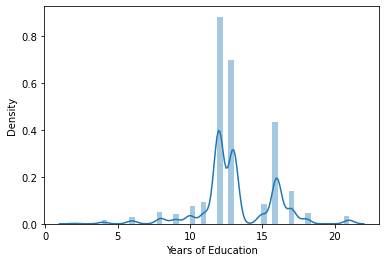

In [11]:
# Add a graph in each part
sns.distplot(Train['Years of Education'])

# Outlier Locatization
hk_mean = Train['Years of Education'].mean()
hk_std = Train['Years of Education'].std()

# No outliers are shown, so theres no need to show the outliers localization

#Train.loc[Train['Years of Education'] > hk_mean + 5 * hk_std]

#Train.loc[Train['Years of Education'] < hk_mean - 5 * hk_std]


#### Working Hours per Week

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Working Hours per week', ylabel='Density'>

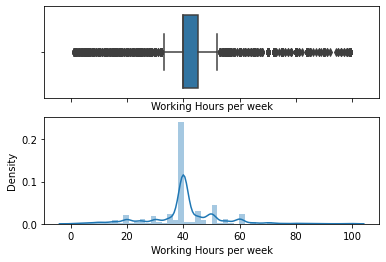

In [12]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(Train['Working Hours per week'], ax=ax_box)
sns.distplot(Train['Working Hours per week'], ax=ax_hist)

# No outliers are shown, so theres no need to show the outliers localization

#hk_mean = Train['Working Hours per week'].mean()
#hk_std = Train['Working Hours per week'].std()

#Train.loc[Train['Working Hours per week'] > hk_mean + 5 * hk_std]
#Train.loc[Train['Working Hours per week'] < hk_mean - 5 * hk_std]

#### Ticket Price

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of Outliers: 178


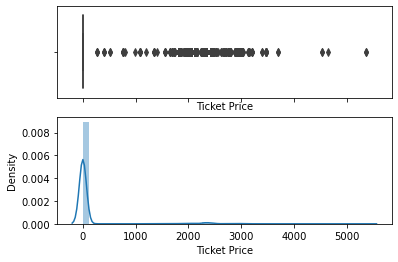

In [13]:
# Ver melhor
# Filtering the positives price of ticket
#positive_price = Train[Train['Ticket Price']>0]['Ticket Price']
positive_price = Train['Ticket Price']
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(positive_price, ax=ax_box)
sns.distplot(positive_price, ax=ax_hist)

# Outliers Detection

hk_mean = Train['Ticket Price'].mean()
hk_std = Train['Ticket Price'].std()

# According to this, 'Ticket Price' have outliers
Ticket_price_out = Train.loc[Train['Ticket Price'] > hk_mean + 5 * hk_std]['Ticket Price']
outliers_TP = list(Ticket_price_out)


print('Number of Outliers:' ,len(outliers_TP))
# No outliers are showed
#Train.loc[Train['Ticket Price'] < hk_mean - 5 * hk_std]

#### Money Received

/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of Outliers: 116


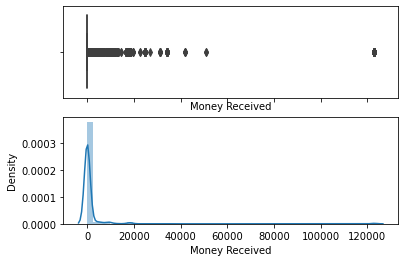

In [14]:
# Filtering the positives "Money Received"
# positive_money_received = non_cat[non_cat['Money Received']>0]['Money Received']
money_received = Train['Money Received']
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (3, 3.5)})
# Add a graph in each part
sns.boxplot(money_received, ax=ax_box)
sns.distplot(money_received, ax=ax_hist)

# Outlier Detection

hk_mean = Train['Money Received'].mean()
hk_std = Train['Money Received'].std()

money_outlier = Train.loc[Train['Money Received'] > hk_mean + 5 * hk_std]['Money Received']
outliers_MR = list(money_outlier)
print('Number of Outliers:' ,len(money_outlier))

#Train.loc[Train['Money Received'] < hk_mean - 5 * hk_std]


A new column named 'Outlier' will be created in order to filter the Train dataset. 

In [15]:
# Filter the index of outliers of 'Ticket Price' in the dataset Train
outliers_TP=list(np.unique(outliers_TP))
data_TP=Train[Train['Ticket Price'].isin(outliers_TP)]['Ticket Price'].index

# Filter the index of outliers of 'Money Received' in the dataset Train
outliers_MR=list(np.unique(outliers_MR))
data_MR=Train[Train['Money Received'].isin(outliers_MR)]['Money Received'].index

# Create a unique index
INDEX=data_TP.union(data_MR)

# Assign the values 0 - 'Non outlier' and 1 - 'Outlier'
Train['Outlier'] = 0 
Train.loc[INDEX, 'Outlier'] = 1
Train['Outlier'].value_counts()

# The new dataset 'Train' without the outilers
Train = Train.loc[Train['Outlier'] == 0]

## Modify

### Transform and create variables

In this section a several transformations in the categorical data need to be done. 
It will be assing a numerical value (int) to each possible category for each variable.

In [16]:
# Copy the dataset 'Train'
Train1 = Train.copy()
Test1= Test.copy()

## Variable 'Sex'
# Train
Train1['Sex'] = 0
Train1['Sex'].loc[Train1['Name'].str.startswith("Mr.")] = 1

# Test
Test1['Sex'] = 0
Test1['Sex'].loc[Test1['Name'].str.startswith("Mr.")] = 1

## Variable 'Birthday_year' transformed in the new column 'Age'
# Train
# Create a new column 'Birthday_year' 
Train1['Birthday_year'] = Train1['Birthday'].str.split(",").str[1]
# Create a new column 'Birthday_year'
Test1['Birthday_year'] = Test1['Birthday'].str.split(",").str[1]
# Cast of 'Birthday_year' in 'Train1'
Train1['Birthday_year'] = Train1['Birthday_year'].astype(int)
# Cast of 'Birthday_year' in 'Test1'
Test1['Birthday_year'] = Test1['Birthday_year'].astype(int)
# Create column 'Age' for Train
Train1['Age'] = 2048 - Train1['Birthday_year']
# Create column 'Age' for Test
Test1['Age'] = 2048 - Test1['Birthday_year']


# Variable 'Native Continent' - Assign a numeric value to each continent
## Train
native_cont = Train1['Native Continent'].unique()
j=0
for j, i in enumerate(native_cont):
    Train1['Native Continent'].loc[Train1['Native Continent'] == i] = j
    j=j+1
## Test
native_cont = Test1['Native Continent'].unique()
j=0
for j, i in enumerate(native_cont):
    Test1['Native Continent'].loc[Test1['Native Continent'] == i] = j
    j=j+1

# Variable 'Marital Status' - Assign a numeric value to each continent
# TRain
marital_stat = Train1['Marital Status'].unique()
j=0
for j, i in enumerate(marital_stat):
    Train1['Marital Status'].loc[Train1['Marital Status'] == i] = j
    j=j+1

# Test
marital_stat = Test1['Marital Status'].unique()
j=0
for j, i in enumerate(marital_stat):
    Test1['Marital Status'].loc[Test1['Marital Status'] == i] = j
    j=j+1

# Variable 'Lives with' - Assign a numeric value to each continent
# Train
lives_w = Train1['Lives with'].unique()
j=0
for j, i in enumerate(lives_w):
    Train1['Lives with'].loc[Train1['Lives with'] == i] = j
    j=j+1
    
# Test
lives_w = Test1['Lives with'].unique()
j=0
for j, i in enumerate(lives_w):
    Test1['Lives with'].loc[Test1['Lives with'] == i] = j
    j=j+1

# Variable 'Base Area'
# Train
base_area = Train1['Base Area'].unique()
j=0
for j, i in enumerate(base_area):
    Train1['Base Area'].loc[Train1['Base Area'] == i] = j
    j=j+1
    
# Test
base_area = Test1['Base Area'].unique()
j=0
for j, i in enumerate(base_area):
    Test1['Base Area'].loc[Test1['Base Area'] == i] = j
    j=j+1
    
# Variable 'Education Level'
# Train
educ_level = Train1['Education Level'].unique()
j=0
for j, i in enumerate(educ_level):
    Train1['Education Level'].loc[Train1['Education Level'] == i] = j
    j=j+1
# Test
educ_level = Test1['Education Level'].unique()
j=0
for j, i in enumerate(educ_level):
    Test1['Education Level'].loc[Test1['Education Level'] == i] = j
    j=j+1
    
# Variable 'Employment Sector'
# Train 
emp_sector = Train1['Employment Sector'].unique()
j=0
for j, i in enumerate(emp_sector):
    Train1['Employment Sector'].loc[Train1['Employment Sector'] == i] = j
    j=j+1
# Test
emp_sector = Test1['Employment Sector'].unique()
j=0
for j, i in enumerate(emp_sector):
    Test1['Employment Sector'].loc[Test1['Employment Sector'] == i] = j
    j=j+1
    
# Variable 'Role'
# Train 
role = Train1['Role'].unique()
j=0
for j, i in enumerate(role):
    Train1['Role'].loc[Train1['Role'] == i] = j
    j=j+1
    
# Test
role = Test1['Role'].unique()
j=0
for j, i in enumerate(role):
    Test1['Role'].loc[Test1['Role'] == i] = j
    j=j+1

# DROP VARIABLES - Due to the changes already done above
Train1.drop(columns = ['Name','Birthday', 'Birthday_year'], inplace = True)
Test1.drop(columns = ['Name','Birthday', 'Birthday_year'], inplace = True)


/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Fill Missing data 

In [17]:
# TRAIN DATA

# Fill missing data for the variables with nan values - 'Base Area', 'Employment Sector', 'Role'
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_filled_knn = pd.DataFrame(imputer.fit_transform(Train1[['Base Area', 'Employment Sector', 'Role']]), columns=['Base Area','Employment Sector', 'Role'])
# X_filled_knn.columns
# Merge the filled data above
Train1 = pd.merge(Train1, X_filled_knn, left_index=True, right_index=True)
# Drop the non filled columns
Train1 = Train1.drop(columns=['Base Area_x', 'Employment Sector_x', 'Role_x'])
# Rename 
Train1 = Train1.rename(columns={"Base Area_y": "Base Area", "Employment Sector_y": "Employment Sector", "Role_y": "Role"})

# TEST DATA

imputer = KNNImputer(n_neighbors=5, weights='uniform')
Xtest_filled_knn = pd.DataFrame(imputer.fit_transform(Test1[['Base Area', 'Employment Sector', 'Role']]), columns=['Base Area','Employment Sector', 'Role'])
# Merge the filled data above
Test1 = pd.merge(Test1, Xtest_filled_knn, left_index=True, right_index=True)
# Drop the non filled columns
Test1 = Test1.drop(columns=['Base Area_x', 'Employment Sector_x', 'Role_x'])
# Rename
Test1 = Test1.rename(columns={"Base Area_y": "Base Area", "Employment Sector_y": "Employment Sector", "Role_y": "Role"})

# SET INDEX - Set 'CITIZEN_ID' as index
Train1.set_index('CITIZEN_ID', inplace = True)
Test1.set_index('CITIZEN_ID', inplace = True)

# Cast of the dataset Train and Test to int
Train1 = Train1.astype(int)
Test1 = Test1.astype(int)

# Drop the outlier column
Train1= Train1.drop(columns=['Outlier'])

# Logarithmic of all variables in o






In [45]:
# Logarithmic of all variables in o
Train2 = Train1.copy()
Train2= (np.log(Train2[['Years of Education', 'Working Hours per week', 'Ticket Price', 'Money Received']])).replace(-np.inf, 0)
Train2 = pd.merge(Train1, Train2, left_index=True, right_index=True)
Train2 = Train2.drop(columns = ['Years of Education_x', 'Working Hours per week_x','Money Received_x', 'Ticket Price_x'] )

<ipython-input-45-a11eacba08cf>:3: RuntimeWarning: divide by zero encountered in log
  Train2= (np.log(Train2[['Years of Education', 'Working Hours per week', 'Ticket Price', 'Money Received']])).replace(-np.inf, 0)


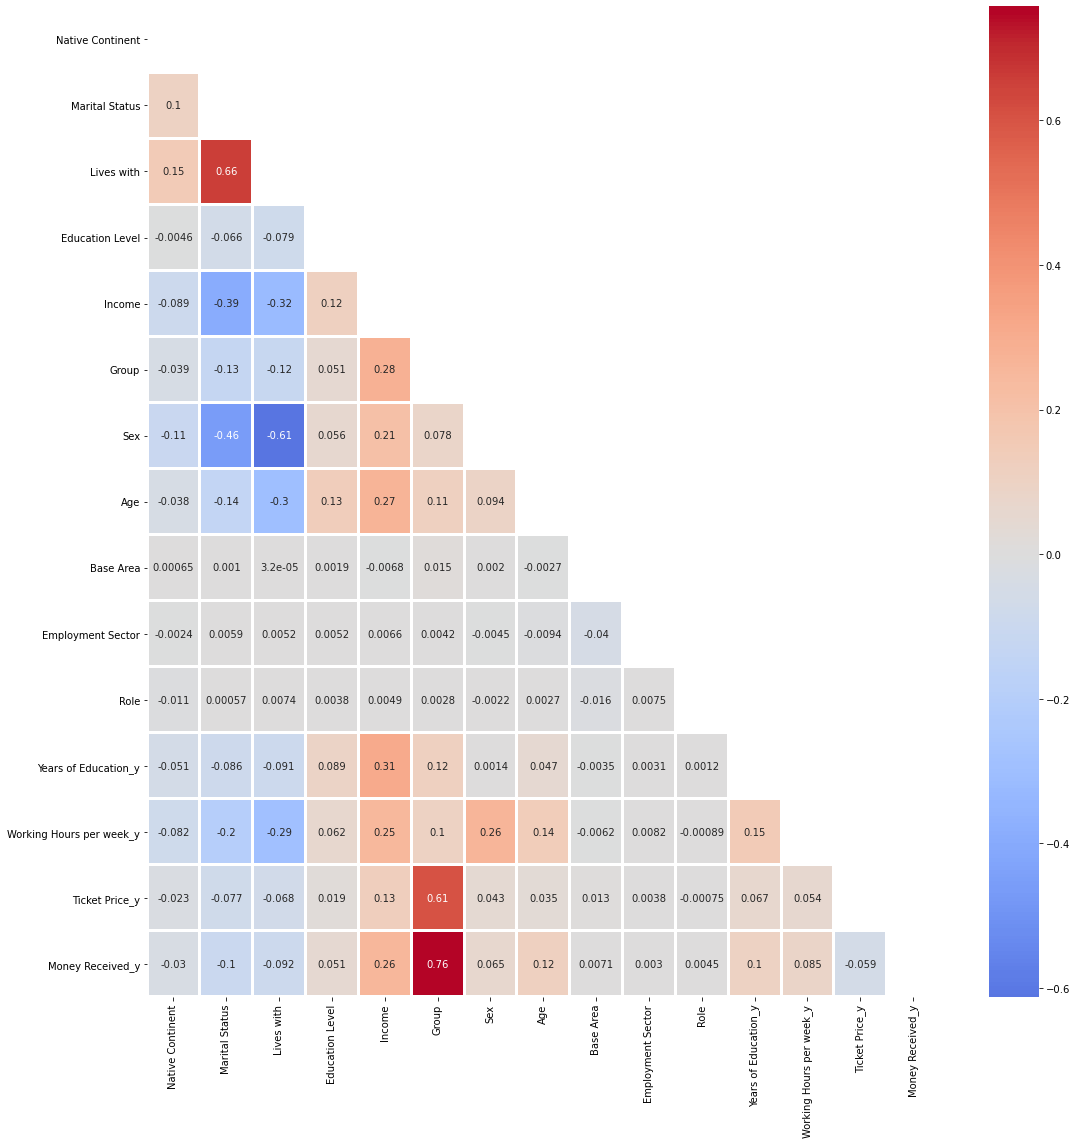

In [47]:
plt.rcParams['figure.figsize'] = (16,16)

corr_matrix=Train2.corr(method = 'spearman')
mask=np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=corr_matrix, mask=mask, center=0, annot=True, linewidths=2, cmap='coolwarm')
plt.tight_layout()

### Correlation Analysis

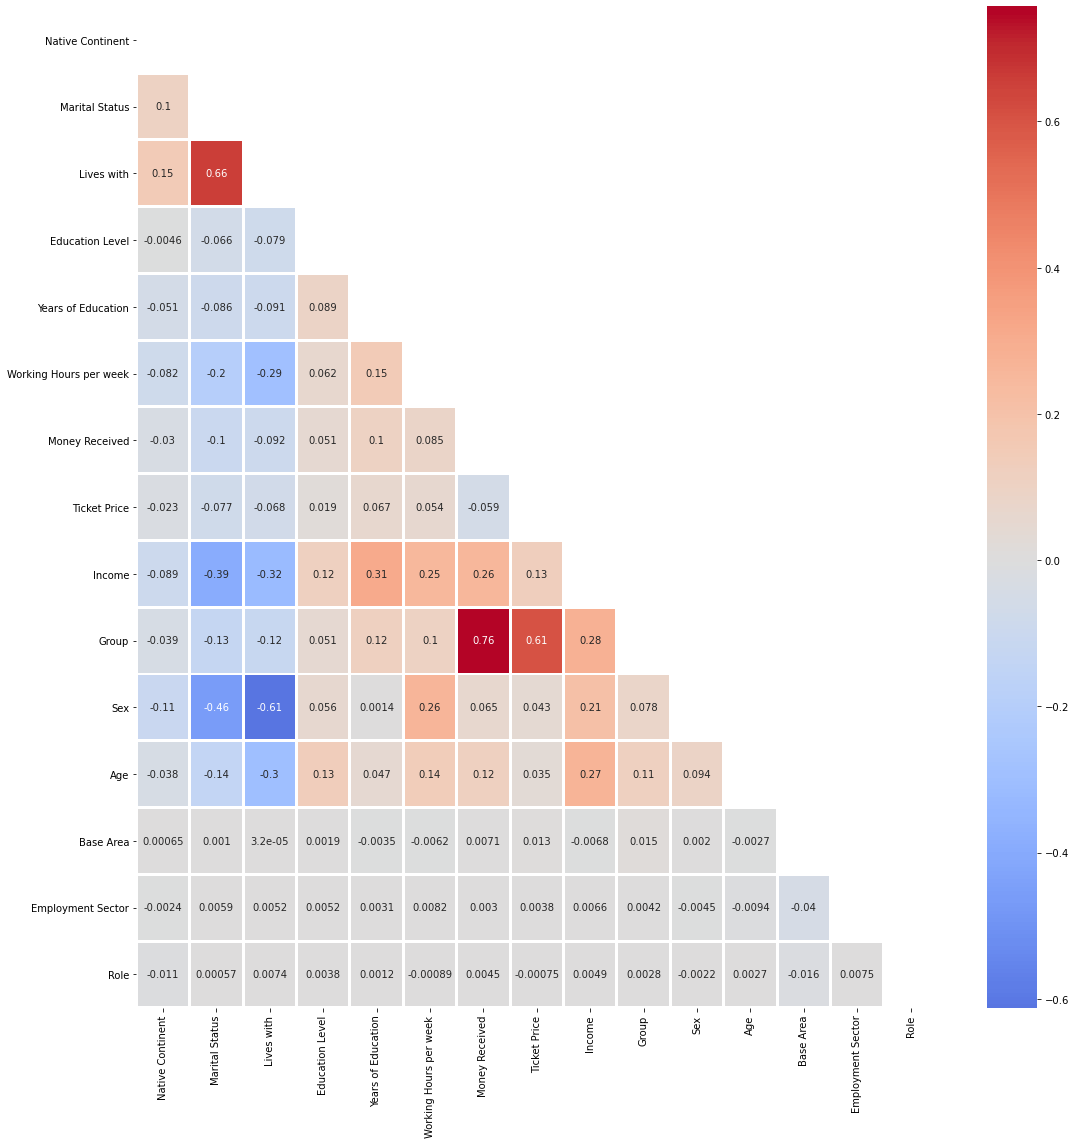

In [151]:
plt.rcParams['figure.figsize'] = (16,16)

corr_matrix=Train1.corr(method = 'spearman')
mask=np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=corr_matrix, mask=mask, center=0, annot=True, linewidths=2, cmap='coolwarm')
plt.tight_layout()

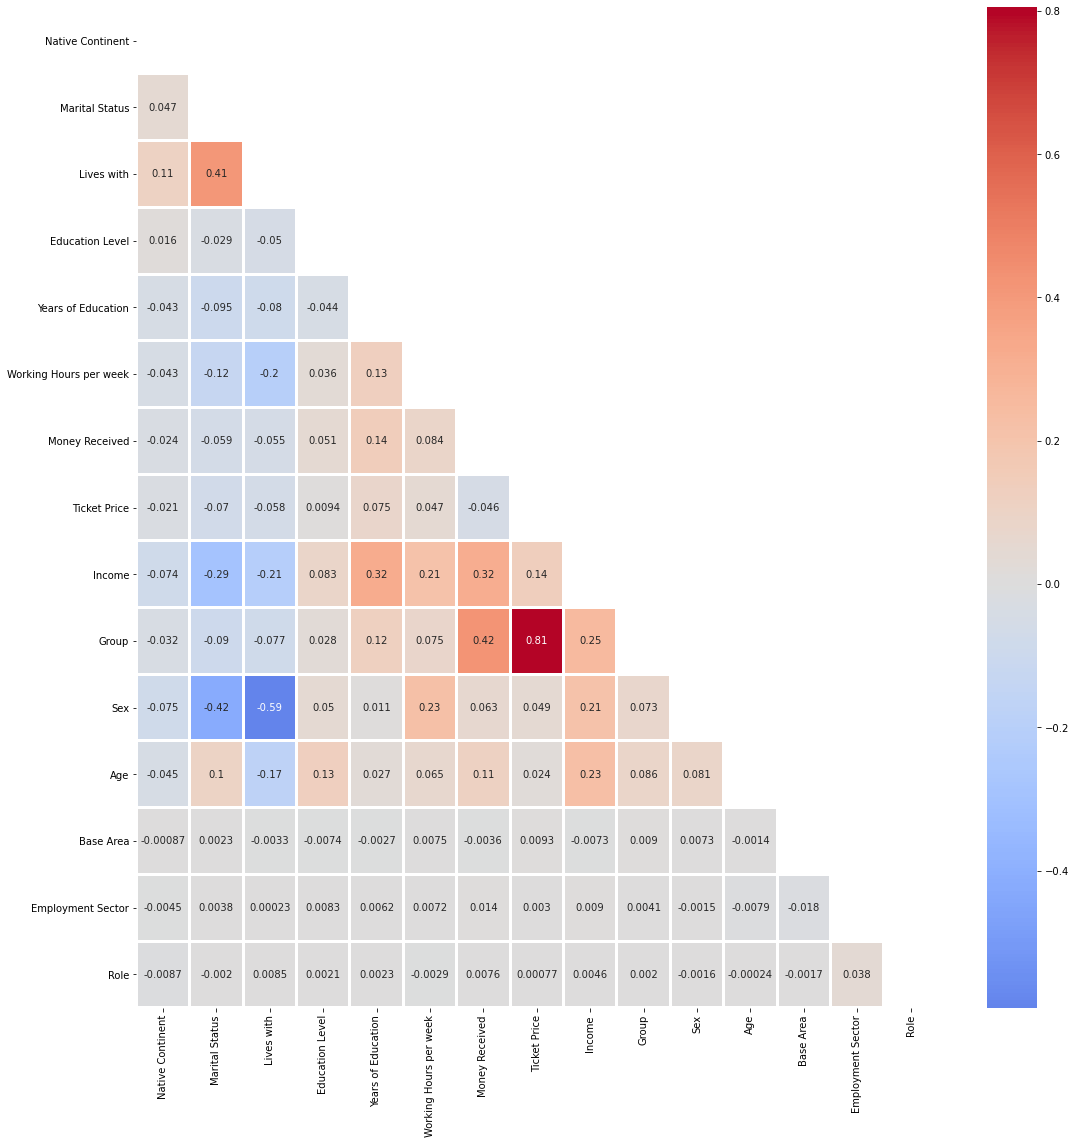

In [75]:
plt.rcParams['figure.figsize'] = (16,16)

metric_matrix = Train1.corr(method = 'pearson')
mask=np.zeros_like(metric_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=metric_matrix, mask=mask, center=0, annot=True, linewidths=2, cmap='coolwarm')
plt.tight_layout()

### Train Validation Partition

In [76]:
TrainVP = Train1.copy()

In [77]:
TrainVP = TrainVP.drop(columns=['Income'])
TrainVP

,Native Continent,Marital Status,Lives with,Education Level,Years of Education,Working Hours per week,Money Received,Ticket Price,Group,Sex,Age,Base Area,Employment Sector,Role
CITIZEN_ID,,,,,,,,,,,,,,
12486,0,0,0,0,13,40,0,2273,2,1,45,0,0,0
12487,0,0,0,1,12,40,0,0,0,1,42,0,1,0
12488,0,0,0,1,12,46,0,2321,2,1,39,0,0,1
12489,0,0,0,2,11,37,5395,0,1,1,63,0,0,2
12490,0,1,1,3,21,45,0,0,0,1,33,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34587,0,4,1,4,15,40,0,0,0,1,28,0,0,4
34588,0,0,0,5,16,40,0,0,0,1,26,0,0,5
34589,0,1,1,1,12,40,0,0,0,1,25,0,1,3


In [78]:
variables = TrainVP.columns


X = Train1[variables]

y = Train1['Income']

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, 
                                                  random_state=15, shuffle=True, stratify=y)

In [80]:
X_train

,Native Continent,Marital Status,Lives with,Education Level,Years of Education,Working Hours per week,Money Received,Ticket Price,Group,Sex,Age,Base Area,Employment Sector,Role
CITIZEN_ID,,,,,,,,,,,,,,
18645,1,1,4,0,13,40,0,0,0,0,27,0,0,5
16132,0,0,3,1,12,20,0,0,0,1,20,0,0,4
33840,0,3,1,5,16,48,0,0,0,0,32,0,6,3
32913,0,0,0,1,12,40,0,0,0,1,53,0,0,5
15506,1,0,0,8,12,60,0,0,0,1,42,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31736,0,0,0,1,12,50,0,0,0,1,27,0,0,6
31840,0,3,2,2,11,53,0,0,0,1,33,0,2,1
20232,0,0,0,6,17,45,0,0,0,1,46,0,3,8


### Data Standardization